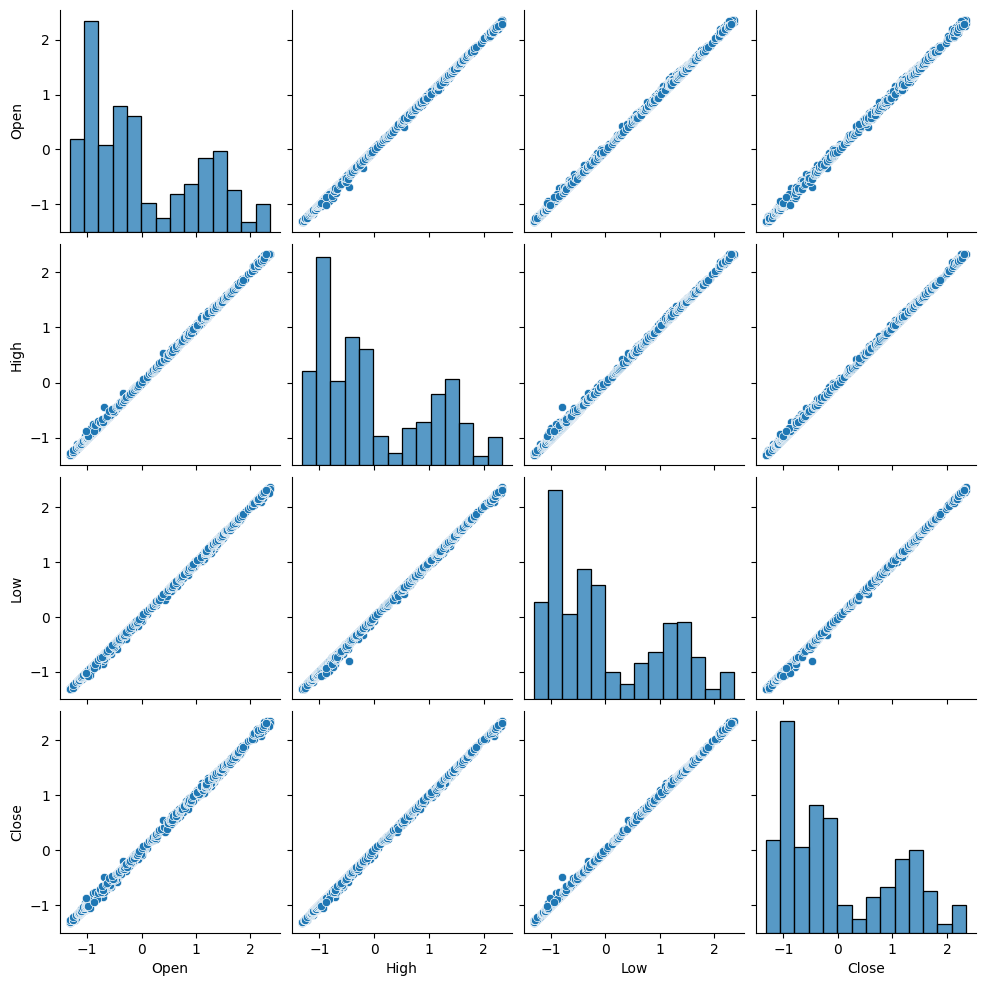

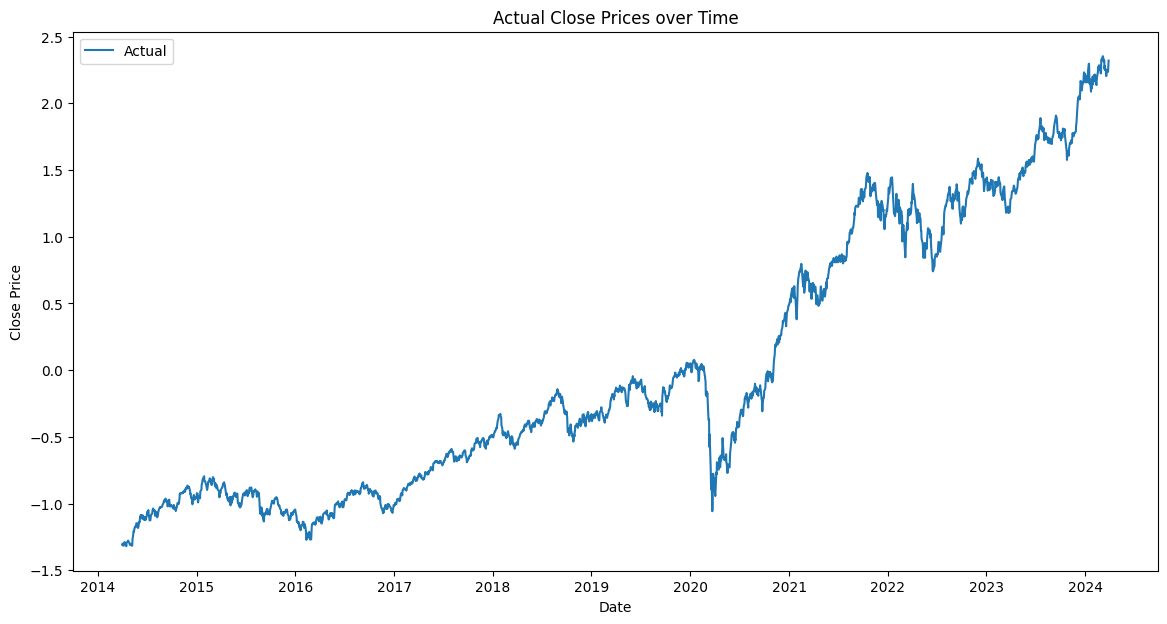

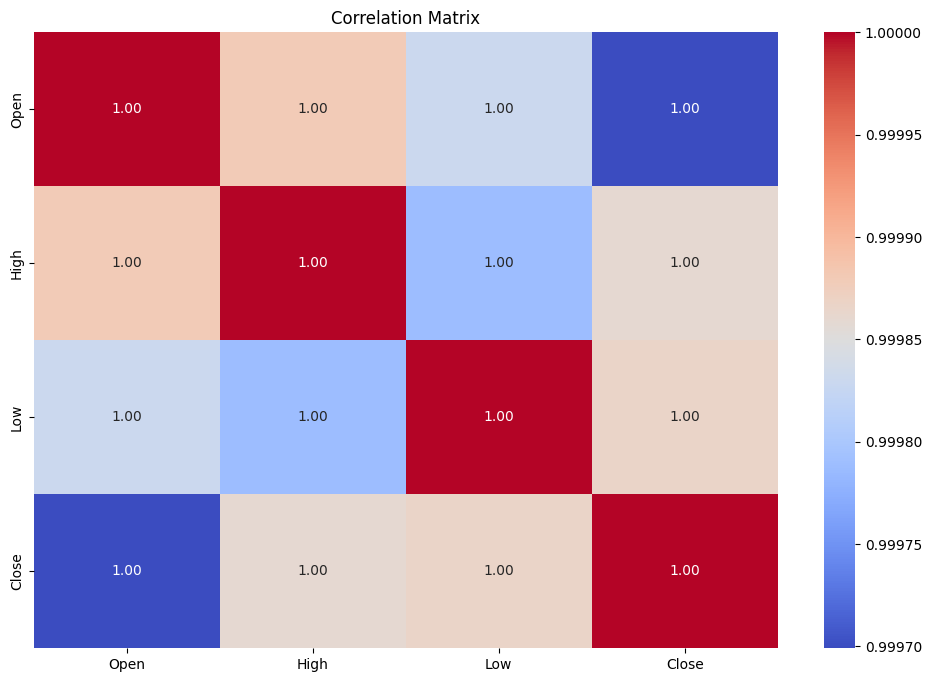

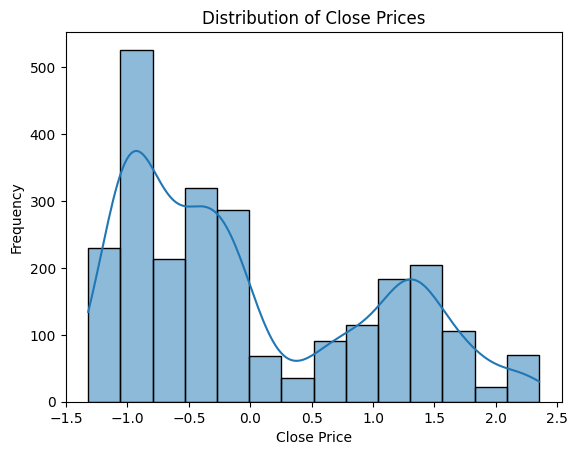

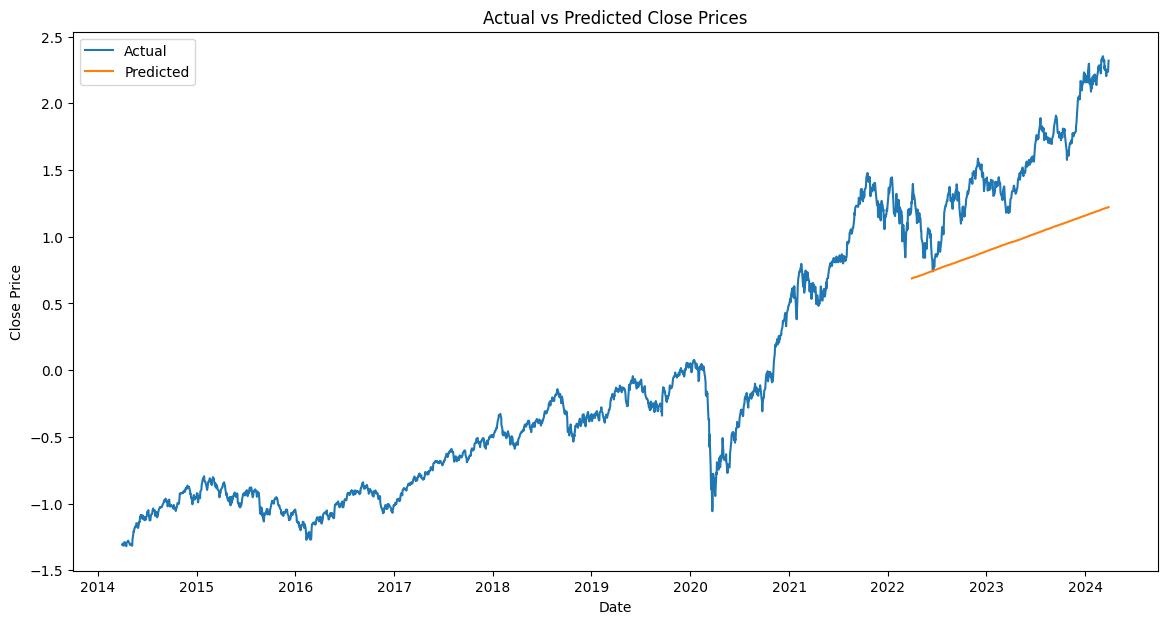

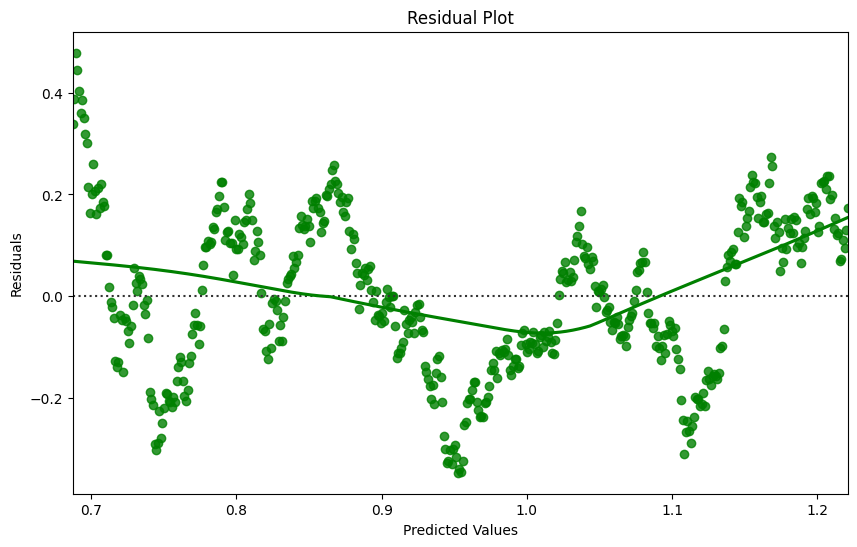

Next predicted reading for Close: 1.222069917549387
Mean Squared Error of the model: 0.39494372789202264


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import glob

def load_data(file_pattern):
    files = glob.glob(file_pattern)
    df_list = [pd.read_csv(file) for file in files]
    return pd.concat(df_list, ignore_index=True)

def clean_data(df):
    df = df.dropna()
    df = df.drop_duplicates()
    return df

def normalize_data(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

def standardize_data(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

def visualize_data(df, columns):
    # Pairplot
    sns.pairplot(df[columns])
    plt.show()

    # Line plot for actual vs predicted values
    if 'Date' in df.columns and 'Close' in columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')
        plt.figure(figsize=(14, 7))
        plt.plot(df['Date'], df['Close'], label='Actual')
        plt.title('Actual Close Prices over Time')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

    # Heatmap for correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

    # Distribution plot for the target variable
    sns.histplot(df['Close'], kde=True)
    plt.title('Distribution of Close Prices')
    plt.xlabel('Close Price')
    plt.ylabel('Frequency')
    plt.show()

def predict_next_readings(df, target_column):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    X = np.arange(len(df)).reshape(-1, 1)
    y = df[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    next_index = np.array([[len(df)]])
    next_prediction = model.predict(next_index)

    # Line plot for actual vs predicted values
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], y, label='Actual')
    plt.plot(df['Date'].iloc[len(X_train):], y_pred, label='Predicted')
    plt.title('Actual vs Predicted Close Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, color='g')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

    return y_pred, next_prediction, mse

file_pattern = 'BSE_SENSEX.csv'
df = load_data(file_pattern)
df = clean_data(df)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df = normalize_data(df, numeric_columns)
df = standardize_data(df, numeric_columns)
visualize_data(df, numeric_columns)

target_column = 'Close'
predictions, next_reading, mse = predict_next_readings(df, target_column)

print(f'Next predicted reading for {target_column}: {next_reading[0]}')
print(f'Mean Squared Error of the model: {mse}')


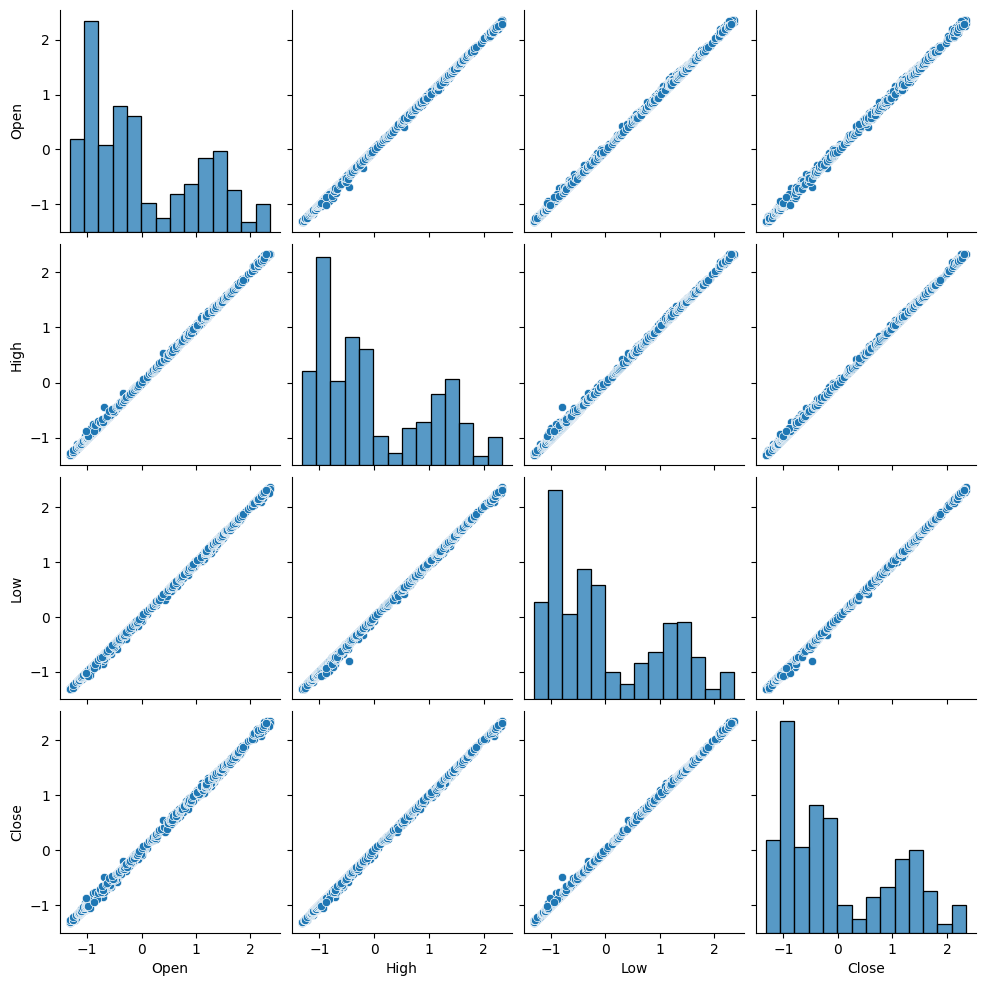

Next predicted reading for Close: 1.222069917549387
Mean Squared Error of the model: 0.39494372789202264


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import glob

def load_data(file_pattern):
    files = glob.glob(file_pattern)
    df_list = [pd.read_csv('BSE_SENSEX.csv') for file in files]
    return pd.concat(df_list, ignore_index=True)

def clean_data(df):
    df = df.dropna()
    df = df.drop_duplicates()
    return df

def normalize_data(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

def standardize_data(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

def visualize_data(df, columns):
    sns.pairplot(df[columns])
    plt.show()

def predict_next_readings(df, target_column):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    X = np.arange(len(df)).reshape(-1, 1)
    y = df[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    next_index = np.array([[len(df)]])
    next_prediction = model.predict(next_index)
    return y_pred, next_prediction, mse

file_pattern = '/content/BSE_SENSEX.csv'
df = load_data(file_pattern)
df = clean_data(df)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df = normalize_data(df, numeric_columns)
df = standardize_data(df, numeric_columns)
visualize_data(df, numeric_columns)

target_column = 'Close'
predictions, next_reading, mse = predict_next_readings(df, target_column)

print(f'Next predicted reading for {target_column}: {next_reading[0]}')
print(f'Mean Squared Error of the model: {mse}')